In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import mpl_toolkits.mplot3d
import numpy as np
import pickle
import pandas as pd
import localization
from localization import LinearizedInversion
import pickle
import os


In [9]:
def getArrayUncertainties(R,radius,spacing,V,NoiseSTD,contoursValues):
    
    # Virtual sources coordinates -> Cube of points (Cartesian coordinates)
    vec = np.arange(-radius, radius+spacing, spacing)
    X, Y, Z = np.meshgrid(vec, vec, vec, indexing='ij')
    Sx = np.reshape(X, X.shape[0]*X.shape[1]*X.shape[2])
    Sy = np.reshape(Y, Y.shape[0]*Y.shape[1]*Y.shape[2])
    Sz = np.reshape(Z, Z.shape[0]*Z.shape[1]*Z.shape[2])
    S = pd.DataFrame({'x': Sx, 'y': Sy, 'z': Sz})
    S = S.to_numpy()

    # find location of slice
    ind = np.argmin(abs(vec))
    sliceValue = vec[ind]
    # Nb of receivers    
    nReceivers = R.shape[0]
    
    # Variance of TDOA measurement errors
    NoiseVariance = NoiseSTD**2
    
    # Define receiver pairs for TDOAs
    Rpairs = localization.defineReceiverPairs(nReceivers)
    Rpairs = np.array(Rpairs)
    
    # Get list of Jacobian matrice for each source
    #R = np.array([R[0], R[1], R[2]]).T
    #R = R.to_numpy()
    J = LinearizedInversion.defineJacobian(R, S, V, Rpairs)

    # Calculates localization uncertainty for each source
    Uncertainties = LinearizedInversion.getUncertainties(J, NoiseVariance)

    return Uncertainties, R, S

In [10]:
def plotArrayUncertainties_3D(R, S, Uncertainties):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, projection='3d')
    # Sources
    points = ax1.scatter(S[:,0], S[:,1], S[:,2], s=10, c=Uncertainties.rms.values, cmap='Spectral')
    cbar = plt.colorbar(points)
    cbar.ax.set_ylabel('Uncertainty (m)')
    # Receivers
    ax1.scatter(R[:,0], R[:,1], R[0,2], s=30, c='black')
    # Axes labels
    ax1.set_xlabel('X (m)', labelpad=10)
    ax1.set_ylabel('Y (m)', labelpad=10)
    ax1.set_zlabel('Z (m)', labelpad=10)
    plt.show()

In [11]:
# ## Large array
out_dir = r'./'
label = 'large-array'
radius = 3 # meters
spacing = 0.3 # meters 0.3
V = 1488 # Sound speed (m/s)
NoiseSTD = 0.00012 # standard deviation of TDOAs
contoursValues = [0.3,0.5]
Colors=['k','r','b','g']
x=[-1,-1, 1,0,-1,1]
y=[-1,-1,-1,0,1,1]
z=[-1,1,-1,0,-1,1]


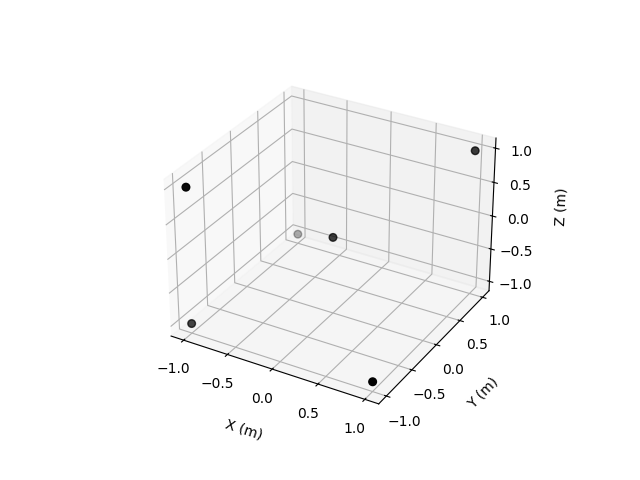

In [13]:
#PLot hydrophone locations

R = pd.DataFrame({'x':x,'y':y, 'z':z})
R = R.to_numpy()

f0 = plt.figure()
ax0 = f0.add_subplot(111, projection='3d')
ax0.scatter(R[:,0], R[:,1], R[:,2], s=30, c='black')
ax0.set_xlabel('X (m)', labelpad=10)
ax0.set_ylabel('Y (m)', labelpad=10)
ax0.set_zlabel('Z (m)', labelpad=10)
plt.show()

In [14]:
#Calculate uncertainties
Uncertainties, R, S = getArrayUncertainties(R,radius,spacing,V,NoiseSTD,contoursValues)

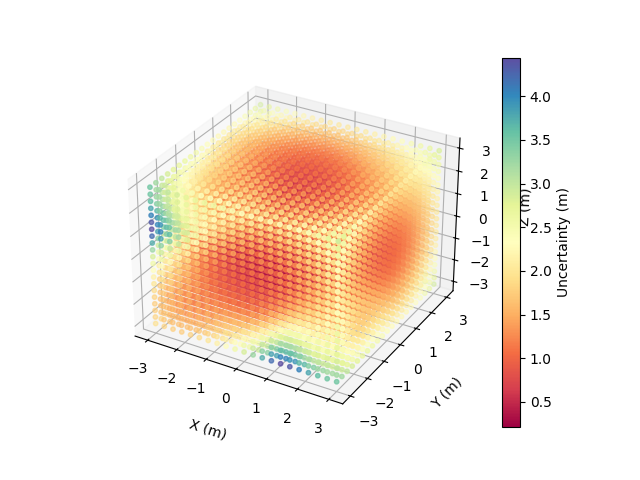

In [15]:
# 3D plot of uncertaities for each simulated source
plotArrayUncertainties_3D(R, S, Uncertainties)